# Shrink or enlarge the domain in Fourier space

In [1]:
import numpy as np
import jax.numpy as jnp
from matplotlib import pyplot as plt
from simplecryoem.utils import (
    volume_comp,
    volume_fourier,
    mip_z,
    rescale_smaller_grid,
    rescale_larger_grid,
)
from jax.config import config

In [2]:
%load_ext autoreload
%autoreload 2

config.update("jax_enable_x64", True)

Text(0.5, 1.0, 'Volume_comp MIP')

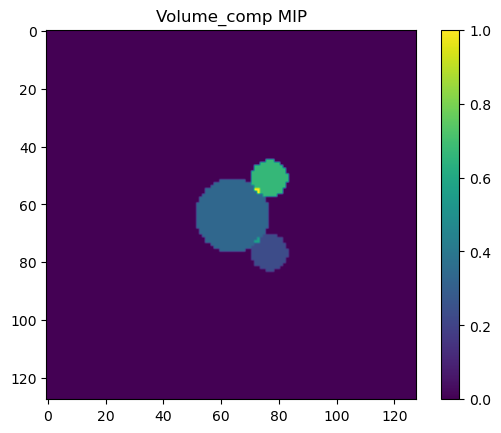

In [3]:
nx = 128
shape = np.array([nx, nx, nx])
dimensions = np.array([20, 20, 20])
pixel_size = dimensions[0] / shape[0]

# A volume with components
centres = np.array([[0, 0, 0], [2, 2, 0], [2, -2, 0]])
radii = np.array([2, 1, 1])
intensities = np.array([10, 7, 20])

vol = jnp.array(volume_comp(shape, dimensions, centres, radii, intensities, False, 10))
vol_fourier, x_grid, _ = volume_fourier(jnp.fft.ifftshift(vol), pixel_size)

mip_z(vol)
# plt.imshow(v[:,:,int(np.floor(v.shape[2]/2))])
plt.colorbar()
plt.title("Volume_comp MIP")

Assume vol is already in the Fourier domain, but use the Fourier grids from ```volume_fourier```.

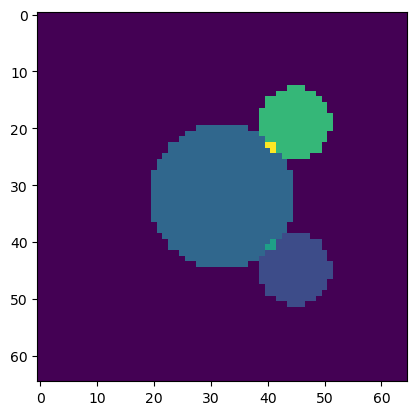

In [4]:
radius = 1.6

vc, x_grid_small, y_grid_small, z_grid_small = rescale_smaller_grid(
    jnp.fft.ifftshift(vol), x_grid, x_grid, x_grid, radius
)
mip_z(jnp.fft.fftshift(vc))

In [5]:
print(vol.shape)
print(vc.shape)

(128, 128, 128)
(65, 65, 65)


In [6]:
vc.shape

(65, 65, 65)

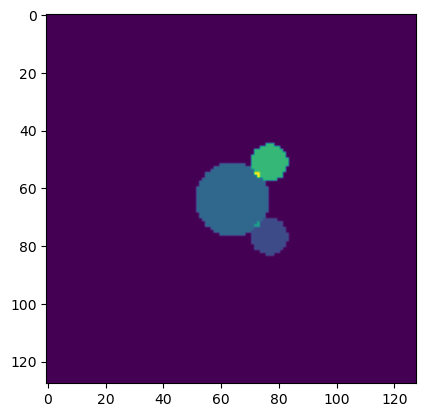

In [7]:
vcc, x_grid_large = rescale_larger_grid(vc, x_grid_small, vol.shape[0])
mip_z(jnp.fft.fftshift(vcc))

In [8]:
jnp.sum(jnp.abs(vol - jnp.fft.fftshift(vcc)))

Array(0., dtype=float64)

In [9]:
print(x_grid)
print(x_grid_small)
print(x_grid_large)

[5.00e-02 1.28e+02]
[0.05, 65]
[0.05, 128]
